# Graded Challenge 1
***

## Introduction

This repository is made by Anjanie Larasati Setiono from batch 016.

The dataset (table) below, taken from bigquery-public-data on Google Cloud Platform, provides a brief summary of the tracked reported cases of Covid-19 in 2019. The dataset was created by the John Hopkins University Center for Systems Science and Engineering.

```
select *
from `bigquery-public-data.covid19_jhu_csse_eu.summary`
; 
```

The objective of this repository is to manipulate the given table to;

1. Find the top 3 and bottom 3 countries, with the total highest and lowest number of confirmed cases, respectively.
2. Compare the total deaths in US and China in 2020, 2021, and 2022, respectively.
3. Compare the total recovered cases, the active cases and deaths.


***

### ***Step 1: Data Retrieval***

The first step to manipulate the table to satisy the given objectives is to import the relevant libraries.

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

***
### ***Step 2: Data Loading***

The second step is to convert the given dataset as a manipulable DataFrame object. Lets rename the dataset to "Covid Table".

In [3]:
covid_table = pd.read_csv('h8dsft_P0GC1_Anjanie_LSetiono.csv')

In [4]:
covid_table

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,Virginia,US,2021-09-15,37.373732,-77.586801,POINT(-77.5868014 37.37373208),35148.0,477.0,NaN,NaN,51041.0,Chesterfield,"Chesterfield, Virginia, US"
1,Virginia,US,2021-09-15,37.264206,-77.396097,POINT(-77.39609676 37.26420587),2256.0,62.0,NaN,NaN,51570.0,Colonial Heights,"Colonial Heights, Virginia, US"
2,Virginia,US,2021-09-15,37.075446,-77.634518,POINT(-77.63451754 37.07544585),2709.0,47.0,NaN,NaN,51053.0,Dinwiddie,"Dinwiddie, Virginia, US"
3,Virginia,US,2021-09-15,37.933576,-76.942303,POINT(-76.94230311 37.93357639),980.0,12.0,NaN,NaN,51057.0,Essex,"Essex, Virginia, US"
4,Virginia,US,2021-09-15,38.836776,-77.275658,POINT(-77.27565836 38.83677558),85647.0,1145.0,NaN,NaN,51059.0,Fairfax,"Fairfax, Virginia, US"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3641595,Beijing,China,2021-12-01,40.182400,116.414200,POINT(116.4142 40.1824),1191.0,9.0,NaN,NaN,NaN,NaN,"Beijing, China"
3641596,Fujian,China,2021-12-01,26.078900,117.987400,POINT(117.9874 26.0789),1322.0,1.0,NaN,NaN,NaN,NaN,"Fujian, China"
3641597,Gansu,China,2021-12-01,35.751800,104.286100,POINT(104.2861 35.7518),344.0,2.0,NaN,NaN,NaN,NaN,"Gansu, China"
3641598,Hebei,China,2021-12-01,37.895700,114.904200,POINT(114.9042 37.8957),1453.0,7.0,NaN,NaN,NaN,NaN,"Hebei, China"


To see the first 5 rows of the given table:

In [5]:
covid_table.head()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
0,Virginia,US,2021-09-15,37.373732,-77.586801,POINT(-77.5868014 37.37373208),35148.0,477.0,NaN,NaN,51041.0,Chesterfield,"Chesterfield, Virginia, US"
1,Virginia,US,2021-09-15,37.264206,-77.396097,POINT(-77.39609676 37.26420587),2256.0,62.0,NaN,NaN,51570.0,Colonial Heights,"Colonial Heights, Virginia, US"
2,Virginia,US,2021-09-15,37.075446,-77.634518,POINT(-77.63451754 37.07544585),2709.0,47.0,NaN,NaN,51053.0,Dinwiddie,"Dinwiddie, Virginia, US"
3,Virginia,US,2021-09-15,37.933576,-76.942303,POINT(-76.94230311 37.93357639),980.0,12.0,NaN,NaN,51057.0,Essex,"Essex, Virginia, US"
4,Virginia,US,2021-09-15,38.836776,-77.275658,POINT(-77.27565836 38.83677558),85647.0,1145.0,NaN,NaN,51059.0,Fairfax,"Fairfax, Virginia, US"


Similarly, to see the last 5 rows of the given table:

In [6]:
covid_table.tail()

,province_state,country_region,date,latitude,longitude,location_geom,confirmed,deaths,recovered,active,fips,admin2,combined_key
3641595,Beijing,China,2021-12-01,40.1824,116.4142,POINT(116.4142 40.1824),1191.0,9.0,NaN,NaN,NaN,NaN,"Beijing, China"
3641596,Fujian,China,2021-12-01,26.0789,117.9874,POINT(117.9874 26.0789),1322.0,1.0,NaN,NaN,NaN,NaN,"Fujian, China"
3641597,Gansu,China,2021-12-01,35.7518,104.2861,POINT(104.2861 35.7518),344.0,2.0,NaN,NaN,NaN,NaN,"Gansu, China"
3641598,Hebei,China,2021-12-01,37.8957,114.9042,POINT(114.9042 37.8957),1453.0,7.0,NaN,NaN,NaN,NaN,"Hebei, China"
3641599,Hubei,China,2021-12-01,30.9756,112.2707,POINT(112.2707 30.9756),68311.0,4512.0,NaN,NaN,NaN,NaN,"Hubei, China"


***
### ***Step 3: Data Cleaning***

In this section, narowing down and renaming certain columns would help us focus on specific data relevant to the given objectives. As such lets delete or remove the columns unnecessary for the objectives;
- latitude
- longitude
- location_geom
- fips
- admin2
- combined_key

To simplify the process, lets group all the unnecessary columns and then delete the group as a whole;

In [7]:
unnecessary_columns = ["latitude", "longitude", "location_geom", "fips", "admin2", "combined_key"]

In [8]:
covid_table.drop(unnecessary_columns, inplace=True, axis=1)

Just to make sure that the unnecessary columns have been deleted, lets check the new table:

In [9]:
covid_table

,province_state,country_region,date,confirmed,deaths,recovered,active
0,Virginia,US,2021-09-15,35148.0,477.0,NaN,NaN
1,Virginia,US,2021-09-15,2256.0,62.0,NaN,NaN
2,Virginia,US,2021-09-15,2709.0,47.0,NaN,NaN
3,Virginia,US,2021-09-15,980.0,12.0,NaN,NaN
4,Virginia,US,2021-09-15,85647.0,1145.0,NaN,NaN
...,...,...,...,...,...,...,...
3641595,Beijing,China,2021-12-01,1191.0,9.0,NaN,NaN
3641596,Fujian,China,2021-12-01,1322.0,1.0,NaN,NaN
3641597,Gansu,China,2021-12-01,344.0,2.0,NaN,NaN
3641598,Hebei,China,2021-12-01,1453.0,7.0,NaN,NaN


Great! The unnecessary columns have been removed and now the table is further summarised to the data we want to focus on. 

To further enhance the table into easier understandable terms, lets rename the columns and rename the table into "ct" to avoid confusion;

In [10]:
ct = covid_table.rename(
    columns = {"province_state": "State", 
               "country_region":"Country",
               "date": "Date",
               "confirmed":"Confirmed_Cases",
               "deaths":"Deaths",
               "recovered":"Recovered_Cases",
               "active":"Active_Cases"}
)

ct

,State,Country,Date,Confirmed_Cases,Deaths,Recovered_Cases,Active_Cases
0,Virginia,US,2021-09-15,35148.0,477.0,NaN,NaN
1,Virginia,US,2021-09-15,2256.0,62.0,NaN,NaN
2,Virginia,US,2021-09-15,2709.0,47.0,NaN,NaN
3,Virginia,US,2021-09-15,980.0,12.0,NaN,NaN
4,Virginia,US,2021-09-15,85647.0,1145.0,NaN,NaN
...,...,...,...,...,...,...,...
3641595,Beijing,China,2021-12-01,1191.0,9.0,NaN,NaN
3641596,Fujian,China,2021-12-01,1322.0,1.0,NaN,NaN
3641597,Gansu,China,2021-12-01,344.0,2.0,NaN,NaN
3641598,Hebei,China,2021-12-01,1453.0,7.0,NaN,NaN


As seen above, there are some values shown as "NaN" in the column "Recovered_Cases" and "Active_Cases". This means that there may be missing values in the table. Let's check how many "NaN" values there are in each column.

In [11]:
ct.isnull().sum()

State               164146
Country                  1
Date                     0
Confirmed_Cases         19
Deaths                 442
Recovered_Cases    2206009
Active_Cases       2214088
dtype: int64

This shows that in column "State" there are out of the 3,641,600 rows, 164,146 of them contain null values. Similarly in column "Deaths", there are 442 null values. 

Given that information, lets remove all the rows that has the "NaN" as it would be problematic to find our objectives with missing values. Thus, cutting down the table to show only the rows and columns with values would be better.

In [12]:
ct = ct.dropna()
ct

,State,Country,Date,Confirmed_Cases,Deaths,Recovered_Cases,Active_Cases
2808,Australian Capital Territory,Australia,2021-07-28,124.0,3.0,121.0,0.0
2809,New South Wales,Australia,2021-07-28,8531.0,67.0,0.0,8464.0
2811,Antwerp,Belgium,2021-07-28,147438.0,0.0,0.0,147438.0
2812,Flemish Brabant,Belgium,2021-07-28,87026.0,0.0,0.0,87026.0
2813,Hainaut,Belgium,2021-07-28,163128.0,0.0,0.0,163128.0
...,...,...,...,...,...,...,...
3641491,Reunion,France,2020-05-04,424.0,0.0,300.0,124.0
3641492,Saskatchewan,Canada,2020-05-04,467.0,7.0,0.0,460.0
3641493,Tibet,China,2020-05-04,1.0,0.0,1.0,0.0
3641494,Turks and Caicos Islands,United Kingdom,2020-05-04,12.0,1.0,6.0,5.0


To ensure that there is no "NaN" in the new table;

In [13]:
ct.isnull().sum()

State              0
Country            0
Date               0
Confirmed_Cases    0
Deaths             0
Recovered_Cases    0
Active_Cases       0
dtype: int64

Great! However, as seen above, the index label has changed and looks messy. Lets reindex the table.

In [14]:
ct.reset_index(drop=True)

,State,Country,Date,Confirmed_Cases,Deaths,Recovered_Cases,Active_Cases
0,Australian Capital Territory,Australia,2021-07-28,124.0,3.0,121.0,0.0
1,New South Wales,Australia,2021-07-28,8531.0,67.0,0.0,8464.0
2,Antwerp,Belgium,2021-07-28,147438.0,0.0,0.0,147438.0
3,Flemish Brabant,Belgium,2021-07-28,87026.0,0.0,0.0,87026.0
4,Hainaut,Belgium,2021-07-28,163128.0,0.0,0.0,163128.0
...,...,...,...,...,...,...,...
1341547,Reunion,France,2020-05-04,424.0,0.0,300.0,124.0
1341548,Saskatchewan,Canada,2020-05-04,467.0,7.0,0.0,460.0
1341549,Tibet,China,2020-05-04,1.0,0.0,1.0,0.0
1341550,Turks and Caicos Islands,United Kingdom,2020-05-04,12.0,1.0,6.0,5.0


Here we can see that our table has been reduced from the original 3,641,600 rows and 13 columns into 1,341,552 rows and 7 columns.

Now it looks like the table is all set for the next step.

***
### ***Step 4: Data Exploration***

Keep in mind, the objective of this repository is to manipulate the given table to;

1. Find the top 3 and bottom 3 countries, with the total highest and lowest number of confirmed cases, respectively.
2. Compare the total deaths in US and China in 2020, 2021, and 2022, respectively.
3. Compare the total recovered cases, the active cases and deaths.

#### Q1.  Find the top 3 and bottom 3 countries, with the total highest and lowest number of confirmed cases, respectively.

First, lets find out what countries are mentioned in the table.

In [15]:
b = ct.groupby("Country", sort=False)["Confirmed_Cases"].sum()
b

Country
Australia         1.140017e+07
Belgium           2.278692e+08
Brazil            3.888488e+09
Canada            2.886679e+08
Chile             3.347376e+08
China             4.709463e+07
Colombia          7.974275e+08
France            2.795144e+07
Germany           7.679248e+08
India             5.252970e+09
Italy             9.139748e+08
Japan             1.434237e+08
Mexico            6.320546e+08
Netherlands       3.482127e+08
Pakistan          2.282272e+08
Peru              4.958274e+08
Russia            1.293006e+09
Spain             9.049863e+08
Sweden            2.137413e+08
Ukraine           4.647043e+08
United Kingdom    1.108171e+09
Denmark           2.616540e+05
US                3.392212e+09
New Zealand       5.000000e+01
Malaysia          2.142924e+06
Cruise Ship       1.424000e+03
Name: Confirmed_Cases, dtype: float64

Hmmm, that looks difficult to read. One way to make it easier to read is to convert the given outcome into a dictionary then arrange it in descending order.

To keep track of which objective we are working on, lets name the dictionary "Q1".

In [16]:
Q1 = {"Australia" : 1.140017e+07,
"Belgium":2.278692e+08,
"Brazil":3.888488e+09,
"Canada":2.886679e+08,
"Chile":3.347376e+08,
"China":4.709463e+07,
"Colombia":7.974275e+08,
"France":2.795144e+07,
"Germany":7.679248e+08,
"India":5.252970e+09,
"Italy":9.139748e+08,
"Japan":1.434237e+08,
"Mexico":6.320546e+08,
"Netherlands":3.482127e+08,
"Pakistan":2.282272e+08,
"Peru":4.958274e+08,
"Russia":1.293006e+09,
"Spain":9.049863e+08,
"Sweden":2.137413e+08,
"Ukraine":4.647043e+08,
"United Kingdom":1.108171e+09,
"Denmark":2.616540e+05,
"US":3.392212e+09,
"New Zealand":5.000000e+01,
"Malaysia":2.142924e+06,
"Cruise Ship":1.424000e+03,
}

type(Q1)

dict

Awesome, as we can see, "Q1" is a dictionary. Now to arrange in descending order;

In [17]:
sort_data = sorted(Q1.items(), key=lambda x: x[1], reverse=True)
sort_data

[('India', 5252970000.0),
 ('Brazil', 3888488000.0),
 ('US', 3392212000.0),
 ('Russia', 1293006000.0),
 ('United Kingdom', 1108171000.0),
 ('Italy', 913974800.0),
 ('Spain', 904986300.0),
 ('Colombia', 797427500.0),
 ('Germany', 767924800.0),
 ('Mexico', 632054600.0),
 ('Peru', 495827400.0),
 ('Ukraine', 464704300.0),
 ('Netherlands', 348212700.0),
 ('Chile', 334737600.0),
 ('Canada', 288667900.0),
 ('Pakistan', 228227200.0),
 ('Belgium', 227869200.0),
 ('Sweden', 213741300.0),
 ('Japan', 143423700.0),
 ('China', 47094630.0),
 ('France', 27951440.0),
 ('Australia', 11400170.0),
 ('Malaysia', 2142924.0),
 ('Denmark', 261654.0),
 ('Cruise Ship', 1424.0),
 ('New Zealand', 50.0)]

From the outcome, it can be concluded that the top 3 countries with the highest number of total confirmed cases are India, Brazil, and US. Whereas the 3 countries with the lowest number of total confirmed cases are Malaysia, Denmark, and New Zealand. Please note that Cruise Ship is not a country.

#### Q2. Compare the total deaths in US and China in 2020, 2021, and 2022, respectively.

First, lets see if the available years in the table "ct".

In [18]:
l = ct.groupby("Date")
l.first()

,State,Country,Confirmed_Cases,Deaths,Recovered_Cases,Active_Cases
Date,,,,,,
2020-03-22,New York,US,9654.0,63.0,0.0,0.0
2020-03-23,South Carolina,US,1.0,0.0,0.0,0.0
2020-03-24,South Carolina,US,1.0,0.0,0.0,0.0
2020-03-25,Oklahoma,US,2.0,0.0,0.0,0.0
2020-03-26,Missouri,US,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2021-08-04,New South Wales,Australia,10063.0,76.0,0.0,9987.0
2021-09-22,Johor,Malaysia,184221.0,152550.0,3012.0,0.0
2022-02-14,Guernsey,United Kingdom,12599.0,31.0,0.0,0.0


Alright, it looks like the date starts from March 2020 and ends in September 2022.

Next, lets see if there is data avaialable for deaths in China and US in 2020, 2021 & 2022.

In 2020;

In [19]:
Q2020 = ct[ct["Date"] < "2021-01-01"]
Q2020

,State,Country,Date,Confirmed_Cases,Deaths,Recovered_Cases,Active_Cases
9454,Northern Territory,Australia,2020-11-21,46.0,0.0,39.0,7.0
9455,Tasmania,Australia,2020-11-21,230.0,13.0,217.0,0.0
9458,Hainaut,Belgium,2020-11-21,89570.0,0.0,0.0,89570.0
9459,Limburg,Belgium,2020-11-21,23128.0,0.0,0.0,23128.0
9460,Luxembourg,Belgium,2020-11-21,15608.0,0.0,0.0,15608.0
...,...,...,...,...,...,...,...
3641491,Reunion,France,2020-05-04,424.0,0.0,300.0,124.0
3641492,Saskatchewan,Canada,2020-05-04,467.0,7.0,0.0,460.0
3641493,Tibet,China,2020-05-04,1.0,0.0,1.0,0.0
3641494,Turks and Caicos Islands,United Kingdom,2020-05-04,12.0,1.0,6.0,5.0


In [20]:
Q2020["Country"].value_counts()

US                895670
Russia             17762
Japan              10604
China               9405
India               7537
Colombia            7349
Mexico              7282
Brazil              6121
Ukraine             5778
Peru                5668
Italy               4872
Spain               4612
Sweden              4410
Germany             3944
Canada              3909
United Kingdom      3839
Chile               3728
Netherlands         3313
France              2836
Australia           2281
Pakistan            1435
Belgium              600
Denmark              570
Cruise Ship            2
Name: Country, dtype: int64

Yes, there is data on US and China in 2020.

Now lets check for 2021;

In [21]:
Q2021 = ct[ct["Date"] > "2020-12-31"]
Q2021

,State,Country,Date,Confirmed_Cases,Deaths,Recovered_Cases,Active_Cases
2808,Australian Capital Territory,Australia,2021-07-28,124.0,3.0,121.0,0.0
2809,New South Wales,Australia,2021-07-28,8531.0,67.0,0.0,8464.0
2811,Antwerp,Belgium,2021-07-28,147438.0,0.0,0.0,147438.0
2812,Flemish Brabant,Belgium,2021-07-28,87026.0,0.0,0.0,87026.0
2813,Hainaut,Belgium,2021-07-28,163128.0,0.0,0.0,163128.0
...,...,...,...,...,...,...,...
3639255,Zakarpattia Oblast,Ukraine,2021-02-17,35602.0,812.0,29476.0,5314.0
3639256,Zhytomyr Oblast,Ukraine,2021-02-17,46962.0,789.0,43174.0,2999.0
3639257,Anguilla,United Kingdom,2021-02-17,18.0,0.0,18.0,0.0
3639258,Cayman Islands,United Kingdom,2021-02-17,419.0,2.0,388.0,29.0


In [22]:
Q2021["Country"].value_counts()

US                212863
Russia             17928
Japan              10576
India               7992
Colombia            7317
China               7282
Mexico              7128
Ukraine             5833
Brazil              5832
Peru                5616
Sweden              4536
Italy               4536
Spain               4320
Germany             3672
Netherlands         3672
Chile               3579
United Kingdom      3404
Canada              3240
Belgium             2592
France              2374
Australia           1722
Pakistan            1512
Denmark              432
New Zealand           50
Malaysia              17
Name: Country, dtype: int64

Yes, there is also data on US and China in 2021.

Now for 2022;

In [23]:
ct[ct["Date"] > "2021-12-31"]

,State,Country,Date,Confirmed_Cases,Deaths,Recovered_Cases,Active_Cases
199114,Guernsey,United Kingdom,2022-02-14,12599.0,31.0,0.0,0.0
213878,Unknown,Ukraine,2022-07-11,247991.0,3937.0,0.0,0.0
817542,Jersey,United Kingdom,2022-02-14,34367.0,106.0,0.0,0.0
1306024,Pitcairn Islands,United Kingdom,2022-09-20,4.0,0.0,0.0,0.0


Unfortunately, there is no data for US and China in 2022. The only recorded data for 2022 comes from United KIngdom and Ukraine as seen above. As such, we will only be able to find and compare the total deaths of US and China in 2020 and 2021.

Let the total deaths of US be represented as "USd" while the total deaths of China be represented as "Cd".

In 2020,

In [24]:
USd = Q2020.loc[Q2020["Country"] == "US","Deaths"].sum()
USd

46376703.0

In [25]:
Cd = Q2020.loc[Q2020["Country"] == "China","Deaths"].sum()
Cd

1302526.0

In [26]:
USd > Cd

True

In [27]:
USd - Cd

45074177.0

In 2020, we can see that the total deaths in US is higher than that in China, with a difference of 45,074,177.

In 2021,

In [28]:
USd2 = Q2021.loc[Q2021["Country"] == "US","Deaths"].sum()
USd2

28846030.0

In [29]:
Cd2 = Q2021.loc[Q2021["Country"] == "China","Deaths"].sum()
Cd2

1044542.0

In [30]:
USd2 > Cd2

True

In [31]:
USd2 - Cd2

27801488.0

In 2021, we can see that the total deaths in US is higher than that in China, with a difference of 27,801,488.

Thus we can conclude that in both cases between 2020 and 2021 respectively, the total deaths in US is higher than that in China.

#### Q3. Compare the total recovered cases, the active cases and deaths.

First, lets find the general sum of all types of cases per country.

Let the dataset of the general sum of all types of cases per country be represented as "GS".

In [32]:
GS = ct.groupby('Country').sum()
GS

,Confirmed_Cases,Deaths,Recovered_Cases,Active_Cases
Country,,,,
Australia,1.140017e+07,323804.0,9.308653e+06,1.767698e+06
Belgium,2.278692e+08,5904502.0,0.000000e+00,2.219700e+08
Brazil,3.888488e+09,106981806.0,3.410800e+09,3.707073e+08
Canada,2.886679e+08,7385240.0,2.642481e+08,1.727535e+07
Chile,3.347376e+08,7897825.0,3.157848e+08,1.108825e+07
China,4.709463e+07,2347068.0,4.430510e+07,4.422210e+05
Colombia,7.974275e+08,21107467.0,7.339135e+08,3.385045e+07
Cruise Ship,1.424000e+03,16.0,1.134000e+03,2.740000e+02
Denmark,2.616540e+05,216.0,2.487240e+05,1.271400e+04


Let the total recovered cases be represented as "rc", the active cases as "ac" and the deaths as "dc".

In [33]:
rc = GS["Recovered_Cases"].sum(axis=0)
rc

14472807779.0

In [34]:
ac = GS["Active_Cases"].sum(axis=0)
ac

6773254623.0

In [35]:
dc = GS["Deaths"].sum(axis=0)
dc

549978388.0

Over the span of 3 years (from 2020-2022), the total number of confirmed cases came out to be 14,472,807,779, while the total active cases is 6,773,254,623, and the total deaths surmount to 549,978,388 lives.

***
## Conclusion

In [36]:
ct.describe()

,Confirmed_Cases,Deaths,Recovered_Cases,Active_Cases
count,1.341552e+06,1.341552e+06,1.341552e+06,1.341552e+06
mean,1.623901e+04,4.099568e+02,1.078811e+04,5.048820e+03
std,1.165994e+05,2.992416e+03,1.054505e+05,7.473435e+04
min,-3.028440e+05,-1.780000e+02,-8.544050e+05,-6.298082e+06
25%,7.700000e+01,1.000000e+00,0.000000e+00,5.200000e+01
50%,5.740000e+02,1.000000e+01,0.000000e+00,4.440000e+02
75%,3.107000e+03,5.800000e+01,0.000000e+00,2.057000e+03
max,6.327194e+06,6.246410e+05,6.399531e+06,1.087776e+07


In general we can see that the total average confirmed cases of the given dataset is 1,341,552 

count - The number of not-empty values.
mean - The average (mean) value.
std - The standard deviation.
min - the minimum value.
25% - The 25% percentile*.
50% - The 50% percentile*.
75% - The 75% percentile*.
max - the maximum value.

For Q1, the two graphs below shows the top 3 countries with the highest total confirmed cases (G1) and the other 3 countries with the lowest total confirmed cases (G2). Although the difference in numbers between the highest number of cases and the lowest number of cases are quite stark, the reason as to why such difference occurs is not available in the current data set.

In [37]:
G1 = {"Country": ["India","Brazil", "US"],
     "Total Confirmed Cases": [5252970000.0,3888488000.0,3392212000.0 ]}

G1 = pd.DataFrame.from_dict(G1)

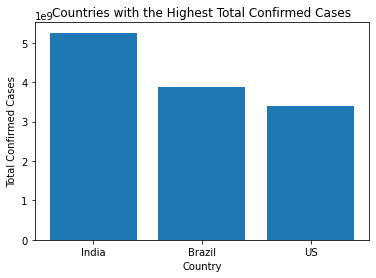

In [38]:
# Initializing the data
x = G1["Country"]
y = G1["Total Confirmed Cases"]
 
# Plotting the data
plt.bar(x, y)
 
# Adding title to the plot
plt.title("Countries with the Highest Total Confirmed Cases")
 
# Adding label on the y-axis
plt.ylabel("Total Confirmed Cases")
 
# Adding label on the x-axis
plt.xlabel("Country")
 
plt.show()

In [39]:
G2 = {"Country": ["Malaysia","Denmark", "New Zealand"],
     "Total Confirmed Cases": [2142924.0, 261654.0,50.0]}

G2 = pd.DataFrame.from_dict(G2)

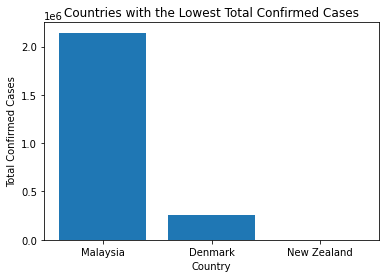

In [40]:
# Initializing the data
x = G2["Country"]
y = G2["Total Confirmed Cases"]
 
# Plotting the data
plt.bar(x, y)
 
# Adding title to the plot
plt.title("Countries with the Lowest Total Confirmed Cases")
 
# Adding label on the y-axis
plt.ylabel("Total Confirmed Cases")
 
# Adding label on the x-axis
plt.xlabel("Country")
 
plt.show()

Apart from that, using the aggregate function, we can see the total number of deaths and average number of deaths for each country. 

In [41]:
agg_functions = {
    'Deaths':
    ['sum', 'mean']
}
  
ct.groupby(['Country']).agg(agg_functions)

Deaths               
                        sum           mean
Country                                   
Australia          323804.0      80.890332
Belgium           5904502.0    1849.781328
Brazil          106981806.0    8950.205471
Canada            7385240.0    1033.045181
Chile             7897825.0    1080.857397
China             2347068.0     140.652484
Colombia         21107467.0    1439.210896
Cruise Ship            16.0       8.000000
Denmark               216.0       0.215569
France             229807.0      44.108829
Germany          19226843.0    2524.532957
India            70628267.0    4548.152940
Italy            33390371.0    3549.146577
Japan             2525011.0     119.216761
Malaysia          1917085.0  112769.705882
Mexico           58571766.0    4064.661069
Netherlands       4823511.0     690.552756
New Zealand             0.0       0.000000
Pakistan          4983768.0    1691.132677
Peru             25629642.0    2271.325948
Russia           27392282.0     767.505800
Spain            23541078.0    2635.588670
Sweden            4145821.0     463.427342
US               75222733.0      67.857910
Ukraine           9864990.0     849.624494
United Kingdom   35937469.0    4961.682866

Here, we can see that there were no confirmed deaths in New Zealand while the highest number of confirmed deaths is located in India. For Q2, we focused on the total number of deaths in US and China respectively, and set more parameters pertaining to the years. As the aggregate function does not show the total number of deaths per year for each country, we had to use a different method as shown in Q2.

Lastly, for Q3., as shown in the pie chart below, we can see the comparison between the total recoverd cases, active cases and deaths, respectively spanning from 2020-2022.

Text(0.5, 1.0, 'Total Recovered Cases, Active Cases, and Deaths Respectively')

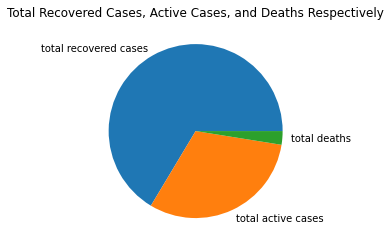

In [42]:
# initializing the data
totals = ["total recovered cases", "total active cases", "total deaths"]
data = [14472807779.0, 6773254623.0, 549978388.0]
 
# plotting the data
plt.pie(data, labels=totals)
 
# Adding title to the plot
plt.title("Total Recovered Cases, Active Cases, and Deaths Respectively")

Overall, we can see that despite the high numbers of total confirmed cases and deaths, the number of total recovered cases seem to end on a more positive note. 